# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alfan Duta Pamungkas
- **Email:** alfandutapamungkas826@gmail.com
- **ID Dicoding:** alfan_duta_pamungkas

## Background

Sistem bike sharing merupakan generasi baru dari rental sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari satu posisi tertentu dan mengembalikannya di posisi yang berbeda. Saat ini, terdapat lebih dari 500 program bike sharing di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Dewasa ini, terdapat minat besar terhadap sistem-sistem ini karena peran pentingnya dalam masalah lalu lintas, lingkungan, dan kesehatan.

Selain aplikasi dunia nyata yang menarik dari sistem bike sharing, karakteristik data yang dihasilkan oleh sistem ini membuatnya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan secara eksplisit tercatat dalam sistem ini. Fitur ini mengubah sistem bike sharing menjadi jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas di kota. Oleh karena itu, diharapkan sebagian besar peristiwa penting di kota dapat terdeteksi melalui pemantauan data-data ini.

=========================================================

Karakteristik Dataset

Baik hour.csv maupun day.csv memiliki field-field berikut,

kecuali hr yang tidak tersedia di day.csv

=========================================================

- instant: indeks record
- dteday : tanggal
- season : musim (1:semi, 2:panas, 3:gugur, 4:dingin)
- yr : tahun (0: 2011, 1:2012)
- mnth : bulan (1 sampai 12)
- hr : jam (0 sampai 23)
- holiday : apakah hari tersebut hari libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
- weekday : hari dalam seminggu
- workingday : jika hari tersebut bukan akhir pekan atau hari libur bernilai 1, selain itu 0.
+ weathersit :
	- 1: Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan
	- 2: Berkabut + Berawan, Berkabut + Awan pecah, Berkabut + Sedikit berawan, Berkabut
	- 3: Salju ringan, Hujan ringan + Badai petir + Awan tersebar, Hujan ringan + Awan tersebar
	- 4: Hujan deras + Butiran es + Badai petir + Berkabut, Salju + Kabut
- temp : Suhu ternormalisasi dalam Celsius. Nilai-nilai dibagi dengan 41 (maksimal)
- atemp: Suhu yang dirasakan ternormalisasi dalam Celsius. Nilai-nilai dibagi dengan 50 (maksimal)
- hum: Kelembaban ternormalisasi. Nilai-nilai dibagi dengan 100 (maksimal)
- windspeed: Kecepatan angin ternormalisasi. Nilai-nilai dibagi dengan 67 (maksimal)
- casual: jumlah pengguna kasual
- registered: jumlah pengguna terdaftar
- cnt: jumlah total sepeda yang disewa termasuk pengguna kasual dan terdaftar


## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca (weathersit) terhadap jumlah penyewaan sepeda pada jam sibuk (07.00–09.00 & 16.00–19.00)?
- Bagaimana pola penyewaan sepeda bervariasi sepanjang jam operasional di setiap musim, dan apa perbedaan signifikan antara jam puncak dan jam terendah?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

1. Load day dataset

In [ ]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2. Load hour dataset

In [ ]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai data day_df

1. Melihat tipe data apa saja yang terdapat di day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil output, ditemukan satu kolom yang memiliki tipe data yang tidak tepat yaitu kolom 'dteday' yang masih berupa object padahal seharusnya bertipe datetime untuk memudahkan analisis. Kemudian dari sini juga terlihat bahwa data day_df tidak memiliki nilai kosong.

2. Melihat apakah terdapat data duplikat

In [ ]:
day_df.duplicated().sum()

np.int64(0)

3. Statistik deskriptif dari day_df

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Kolom 'dteday' masih berupa object
- Tidak memiliki nilai kosong
- Tidak memiliki data duplikat
- Berdasarkan analisis statistik deskriptif, tidak memiliki kejanggalan

#### Menilai data hour_df

1. Melihat tipe data apa saja yang terdapat di hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil output, ditemukan satu kolom yang memiliki tipe data yang tidak tepat yaitu kolom 'dteday' yang masih berupa object padahal seharusnya bertipe datetime untuk memudahkan analisis. Kemudian dari sini juga terlihat bahwa data day_df tidak memiliki nilai kosong.

2. Melihat apakah terdapat data duplikat

In [ ]:
hour_df.duplicated().sum()

np.int64(0)

3. Statistik deskriptif dari hour_df

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kolom 'dteday' masih berupa object
- Tidak memiliki nilai kosong
- Tidak memiliki data duplikat
- Berdasarkan analisis statistik deskriptif, tidak memiliki kejanggalan

### Cleaning Data

1. Mengubah tipe data kolom 'dteday' menjadi datetime di day_df

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

2. Mengubah tipe data kolom 'dteday' menjadi datetime di hour_df

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
Kolom 'dteday' di kedua dataset sudah diubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore day_df

1. Analisis statistik deskriptif

In [ ]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan analisis deskriptif dataset bike sharing selama periode 731 hari (2011-2012), teridentifikasi beberapa insight penting untuk strategi operasional. Dataset menunjukkan rata-rata penggunaan harian sebesar 4.504 sepeda dengan standar deviasi 1.937, mengindikasikan adanya variabilitas demand yang cukup tinggi.

Dari perspektif segmentasi pengguna, terdapat dominasi yang jelas dari pengguna terdaftar dengan rata-rata 3.656 penyewaan berbanding 848 untuk pengguna kasual. Faktor eksternal seperti cuaca menunjukkan kondisi yang relatif mendukung dengan rata-rata weathersit 1.4 (mendekati kondisi cerah) dan suhu rata-rata 0.495 (sekitar 20°C). Namun, standar deviasi yang cukup besar pada variabel penggunaan mengindikasikan bahwa terdapat faktor-faktor lain yang mempengaruhi demand pattern.

2. Distribusi Penggunaan Bike Sharing Berdasarkan Musim

In [ ]:
day_df.groupby(by="season").cnt.sum()

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


Berdasarkan hasil diatas, dapat dilihat bahwa musim gugur adalah yang paling banyak dan musim semi yang paling sedikit menggunakan bike sharing. Fenomena ini cukup masuk akal kalau dipikirkan dari sisi perilaku pengguna bike sharing karena
- musim semi (1) paling sedikit, walaupun suhunya mulai membaik setelah musim dingin, sering masih ada hujan deras, angin kencang, dan cuaca yang tidak stabil.
- Musim gugur (3) paling tinggi
Gugur biasanya sejuk, tidak sepanas musim panas dan tidak sedingin musim semi/dingin → kondisi ideal untuk bersepeda. Inilah kenapa demand di sini puncaknya.

3. Pengaruh Hari Kerja terhadap Jumlah Penyewaan Sepeda

In [ ]:
day_df.groupby(by="workingday")[["casual", "registered", "cnt"]].sum()

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


Dari hasil ini dapat disimpulkan bahwa bike sharing lebih banyak digunakan pada hari kerja dibandingkan hari libur dengan didominasi oleh registered user

### Explore hour_df

1. Analisis statistik deskriptif

In [ ]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Data penyewaan sepeda per jam (hour_df) terdiri dari 17.379 observasi, yang mencakup periode tahun 2011 hingga 2012. Rata-rata jumlah sepeda yang dipinjam per jam (cnt) adalah sekitar 189 unit, dengan nilai median 142 unit. Namun, terdapat variasi yang cukup besar: pada jam-jam sepi hanya ada 1 penyewaan, sementara pada jam puncak jumlahnya bisa mencapai 977 penyewaan dalam satu jam. Hal ini menunjukkan bahwa permintaan sepeda sangat bergantung pada waktu, kemungkinan besar meningkat signifikan pada jam sibuk pagi dan sore hari.

Jika dilihat dari tipe pengguna, registered user mendominasi dengan rata-rata sekitar 154 penyewaan per jam, sedangkan casual user hanya sekitar 36 penyewaan per jam. Fakta ini memperkuat temuan sebelumnya bahwa layanan bike sharing lebih banyak digunakan sebagai sarana transportasi rutin (commuting) ketimbang aktivitas rekreasi.

Dari sisi waktu, distribusi data jam (hr) menunjukkan bahwa seluruh 24 jam tercatat secara seimbang. Namun, pola penggunaan kemungkinan membentuk puncak ganda (double peak) di pagi (7–9) dan sore (17–19), sejalan dengan jam berangkat dan pulang kerja. Selain itu, proporsi hari kerja (workingday) lebih dominan dibandingkan hari libur (holiday), sehingga wajar bila sebagian besar penyewaan berasal dari kalangan pekerja atau pelajar.

Secara keseluruhan, gambaran statistik deskriptif ini menunjukkan bahwa permintaan bike sharing sangat dipengaruhi oleh waktu (jam sibuk), hari kerja, serta jenis pengguna. Layanan ini tampak menjadi solusi mobilitas perkotaan yang lebih sering dimanfaatkan untuk perjalanan rutin ketimbang rekreasi santai.

2. Pola Penggunaan Sepeda Berdasarkan Jam (Hourly Pattern)

In [ ]:
hour_df.groupby("hr")["cnt"].mean().reset_index()

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


Dari rata-rata jumlah penyewaan sepeda per jam, terlihat pola yang sangat khas dan konsisten dengan aktivitas sehari-hari masyarakat. Pada dini hari hingga subuh (pukul 0–5), penggunaan sepeda sangat rendah, rata-rata di bawah 50 penyewaan per jam, bahkan mencapai titik terendah sekitar 6 unit pada pukul 4 pagi. Hal ini wajar karena jam tersebut mayoritas orang sedang beristirahat.

Mulai pukul 6 pagi, jumlah penyewaan mulai meningkat signifikan, dengan lonjakan tajam pada pukul 7–9 pagi, yaitu mencapai 212–359 penyewaan per jam. Ini merupakan jam sibuk pertama, yang kemungkinan besar berhubungan dengan aktivitas berangkat kerja atau sekolah.

Setelah pukul 10 hingga sekitar pukul 15, penyewaan cenderung stabil di kisaran 200–250 penyewaan per jam. Namun, lonjakan kedua terjadi pada sore hingga malam hari, terutama pada pukul 17–19 dengan rata-rata penyewaan mencapai 461 unit (pukul 17) dan 425 unit (pukul 18). Inilah jam sibuk kedua yang bertepatan dengan waktu pulang kerja/sekolah.

Setelah pukul 20, jumlah penyewaan menurun secara bertahap hingga mendekati tengah malam, kembali ke kisaran 100–170 penyewaan per jam, sebelum akhirnya sangat rendah lagi pada dini hari.

Secara keseluruhan, pola ini menunjukkan bahwa layanan bike sharing sangat erat kaitannya dengan pola commuting masyarakat perkotaan, dengan dua puncak utama (morning rush dan evening rush), sementara penggunaan di luar jam sibuk relatif rendah.

3. Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu

In [ ]:
hour_df.groupby("weekday")["cnt"].mean()

,cnt
weekday,
0,177.468825
1,183.744655
2,191.238891
3,191.130505
4,196.436665
5,196.135907
6,190.209793


Rata-rata jumlah penyewaan sepeda menunjukkan variasi yang tidak terlalu besar antar hari dalam seminggu. Secara umum, angka penggunaan berkisar antara 177–196 penyewaan per jam.

## Visualization & Explanatory Analysis

### Penggabungan dataset

In [ ]:
day_keep = day_df[["dteday", "season", "weathersit"]]
hour_drop = hour_df.drop(columns=["season", "weathersit"], errors="ignore")
merged = hour_drop.merge(day_keep, on="dteday", how="left")
merged.to_csv("bike_merged.csv", index=False)

print("Jumlah baris setelah merge:", len(merged))
print("Kolom dataset gabungan:", list(merged.columns))
merged.head()

Jumlah baris setelah merge: 17379
Kolom dataset gabungan: ['instant', 'dteday', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season', 'weathersit']


,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season,weathersit
0,1,2011-01-01,0,1,0,0,6,0,0.24,0.2879,0.81,0.0,3,13,16,1,2
1,2,2011-01-01,0,1,1,0,6,0,0.22,0.2727,0.80,0.0,8,32,40,1,2
2,3,2011-01-01,0,1,2,0,6,0,0.22,0.2727,0.80,0.0,5,27,32,1,2
3,4,2011-01-01,0,1,3,0,6,0,0.24,0.2879,0.75,0.0,3,10,13,1,2
4,5,2011-01-01,0,1,4,0,6,0,0.24,0.2879,0.75,0.0,0,1,1,1,2


### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca (weathersit) terhadap jumlah penyewaan sepeda pada jam sibuk (07.00–09.00 & 16.00–19.00)?

1. Definisikan jam sibuk yang telah diketahui dari proses EDA sebelumnya

In [ ]:
rush_hours = merged[(merged["hr"].between(7,9)) | (merged["hr"].between(16,19))]
rush_hours.head()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season,weathersit
7,8,2011-01-01,0,1,7,0,6,0,0.20,0.2576,0.86,0.0000,1,2,3,1,2
8,9,2011-01-01,0,1,8,0,6,0,0.24,0.2879,0.75,0.0000,1,7,8,1,2
9,10,2011-01-01,0,1,9,0,6,0,0.32,0.3485,0.76,0.0000,8,6,14,1,2
16,17,2011-01-01,0,1,16,0,6,0,0.42,0.4242,0.82,0.2985,41,52,93,1,2
17,18,2011-01-01,0,1,17,0,6,0,0.44,0.4394,0.82,0.2836,15,52,67,1,2


2. Rata-rata Penyewaan per Kondisi Cuaca

In [ ]:
q1_result = rush_hours.groupby("weathersit")["cnt"].mean().reset_index()
q1_result.rename(columns={"cnt": "avg_rush_cnt"}, inplace=True)

q1_result

,weathersit,avg_rush_cnt
0,1,352.808215
1,2,298.536316
2,3,142.065217


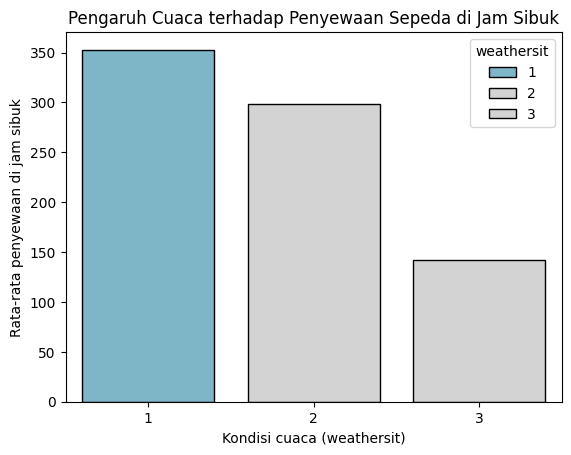

In [ ]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="weathersit",
    y="avg_rush_cnt",
    data=q1_result,
    palette=colors,
    edgecolor="black",
    hue="weathersit",
  )
plt.xlabel("Kondisi cuaca (weathersit)")
plt.ylabel("Rata-rata penyewaan di jam sibuk")
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda di Jam Sibuk")
plt.show()

Data menunjukkan bahwa kondisi cuaca memiliki pengaruh signifikan terhadap perilaku pengguna bike sharing pada jam sibuk (07.00–09.00 & 16.00–19.00).

1. Cuaca cerah (weathersit = 1)

    - Jumlah rata-rata penyewaan mencapai >350 unit per jam.

    - Hal ini menegaskan bahwa cuaca yang baik mendorong masyarakat untuk lebih banyak menggunakan sepeda, terutama saat mobilitas harian tinggi.

2. Cuaca mendung atau berkabut (weathersit = 2)

    - Penyewaan menurun menjadi sekitar 300 unit per jam.

    - Penurunan ini relatif moderat, mengindikasikan bahwa meskipun kondisi tidak seideal cerah, sebagian besar pengguna masih memilih bersepeda.

3. Cuaca hujan atau salju ringan (weathersit = 3)

    - Penyewaan turun drastis hingga sekitar 140 unit per jam, atau hanya sekitar 40% dari jumlah pada kondisi cerah.

    - Hal ini menunjukkan adanya hambatan nyata: faktor keamanan, kenyamanan, dan risiko di jalan mengurangi minat masyarakat menggunakan sepeda.

### Pertanyaan 2: Bagaimana pola penyewaan sepeda bervariasi sepanjang jam operasional di setiap musim, dan apa perbedaan signifikan antara jam puncak dan jam terendah?

1. Mencari Rata-rata Penyewaan per Jam & Musim

In [ ]:
season_hour_avg = merged.groupby(["season", "hr"])["cnt"].mean().reset_index()
season_hour_avg

,season,hr,cnt
0,1,0,27.404494
1,1,1,18.140449
2,1,2,12.794118
3,1,3,7.102564
4,1,4,3.181818
...,...,...,...
91,4,19,297.033898
92,4,20,212.141243
93,4,21,161.327684
94,4,22,123.564972


2. Rata-rata Penyewaan per Jam & Musim

In [ ]:
peak = season_hour_avg.loc[season_hour_avg.groupby("season")["cnt"].idxmax()]
trough = season_hour_avg.loc[season_hour_avg.groupby("season")["cnt"].idxmin()]

season_peak_trough = peak.merge(
    trough, on="season", suffixes=("_peak", "_trough")
)

season_peak_trough["diff"] = season_peak_trough["cnt_peak"] - season_peak_trough["cnt_trough"]
season_peak_trough

,season,hr_peak,cnt_peak,hr_trough,cnt_trough,diff
0,1,17,263.977901,4,3.181818,260.796082
1,2,17,518.847826,4,6.211111,512.636715
2,3,17,572.138298,4,8.240642,563.897656
3,4,17,486.158192,4,7.267045,478.891147


3. Visualisasi

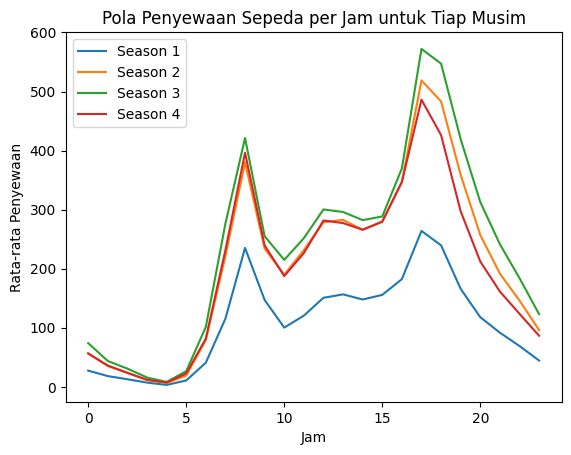

In [ ]:
for s in season_hour_avg["season"].unique():
    subset = season_hour_avg[season_hour_avg["season"] == s]
    plt.plot(subset["hr"], subset["cnt"], label=f"Season {s}")

plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.title("Pola Penyewaan Sepeda per Jam untuk Tiap Musim")
plt.legend()
plt.show()

Pada grafik diatas, terlihat bahwa perilaku pengguna konsisten membentuk dua puncak utama di hampir semua musim. Puncak pertama muncul di pagi hari sekitar 07.00–09.00, sementara puncak kedua muncul di sore hari sekitar 17.00–19.00. Pola ini kemungkinan besar terkait dengan mobilitas rutin, seperti perjalanan ke tempat kerja atau sekolah di pagi hari, lalu perjalanan pulang di sore hari.

Di sisi lain, jam terendah penyewaan terjadi di dini hari (sekitar 02.00–05.00), ketika aktivitas masyarakat relatif minim. Ini menunjukkan adanya siklus alami aktivitas harian yang sangat memengaruhi permintaan penyewaan sepeda.

Jika kita bandingkan antar musim, terlihat perbedaan yang cukup jelas:

- Musim 3 (summer) memiliki volume penyewaan tertinggi, dengan puncak mencapai lebih dari 550 sepeda per jam. Ini menandakan kondisi cuaca yang lebih mendukung aktivitas luar ruang.

- Musim 1 (winter) justru menunjukkan volume paling rendah, meskipun pola puncak-puncaknya tetap serupa. Hal ini logis karena cuaca dingin membatasi aktivitas luar ruang.

- Musim 2 (spring) dan musim 4 (fall) berada di tengah, dengan pola mirip summer, tetapi intensitasnya lebih rendah.

Dengan demikian, meskipun pola jamannya konsisten, intensitas penyewaan sangat dipengaruhi oleh musim. Selisih antara jam puncak dan jam terendah juga semakin besar pada musim dengan permintaan tinggi (summer), sehingga variasinya lebih tajam dibandingkan musim dingin.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

Kondisi cuaca terbukti memiliki pengaruh kuat terhadap tingkat penggunaan layanan bike sharing, khususnya pada jam sibuk. Cuaca cerah mendorong penggunaan sepeda secara maksimal, cuaca mendung atau berkabut hanya menimbulkan penurunan moderat, sementara cuaca hujan atau salju ringan menyebabkan penurunan tajam dalam jumlah penyewaan. Dengan demikian, faktor cuaca menjadi variabel kunci yang perlu diperhatikan dalam perencanaan operasional dan strategi peningkatan penggunaan bike sharing.

- Conclution pertanyaan 2

Pola penyewaan sepeda selalu menunjukkan dua jam puncak utama (pagi dan sore) serta titik terendah pada dini hari di semua musim. Namun, intensitas permintaan berbeda signifikan antar musim: musim panas memiliki penyewaan tertinggi, sedangkan musim dingin terendah. Hal ini menunjukkan bahwa baik jam operasional maupun musim merupakan faktor penting yang secara signifikan memengaruhi tingkat penyewaan sepeda.